In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

# 데이터 불러오기

In [2]:
data_path = '~/data/trip.csv'
original_data = pd.read_csv(data_path)

In [3]:
df = original_data.copy()

In [4]:
df.head()

,passenger_name,tpep_pickup_datetime,tpep_dropoff_datetime,payment_method,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount
0,Pamela Duffy,03/25/2017 8:55:43 AM,03/25/2017 9:09:47 AM,Debit Card,6,3.34,13.0,2.76,0.0
1,Michelle Foster,04/11/2017 2:53:28 PM,04/11/2017 3:19:58 PM,Debit Card,1,1.80,16.0,4.00,0.0
2,Tina Combs,12/15/2017 7:26:56 AM,12/15/2017 7:34:08 AM,Debit Card,1,1.00,6.5,1.45,0.0
3,Anthony Ray,05/07/2017 1:17:59 PM,05/07/2017 1:48:14 PM,Cash,1,3.70,20.5,6.39,0.0
4,Brianna Johnson,04/15/2017 11:32:20 PM,04/15/2017 11:49:03 PM,Debit Card,1,4.37,16.5,0.00,0.0


# 결측치,이상치, 중복치 확인

In [5]:
df.info() # fare-amount에 결측치 확인

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22701 entries, 0 to 22700
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   passenger_name         22701 non-null  object 
 1   tpep_pickup_datetime   22701 non-null  object 
 2   tpep_dropoff_datetime  22701 non-null  object 
 3   payment_method         22701 non-null  object 
 4   passenger_count        22701 non-null  int64  
 5   trip_distance          22701 non-null  float64
 6   fare_amount            22698 non-null  float64
 7   tip_amount             22701 non-null  float64
 8   tolls_amount           22701 non-null  float64
dtypes: float64(4), int64(1), object(4)
memory usage: 1.6+ MB


In [6]:
df[df['fare_amount'].isnull()]

,passenger_name,tpep_pickup_datetime,tpep_dropoff_datetime,payment_method,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount
52,Benjamin Johnson,04/04/2017 4:22:03 PM,04/04/2017 4:35:30 PM,Cash,1,2.20,NaN,0.0,0.00
189,Maria Ibarra,08/21/2017 12:40:25 PM,08/21/2017 1:12:31 PM,Debit Card,3,15.20,NaN,5.0,0.00
244,Tina Avila,08/09/2017 8:32:09 AM,08/09/2017 9:31:11 AM,Cash,1,15.89,NaN,10.0,5.76


In [7]:
display(df[df.trip_distance == 2.2][1:].median()) #mean : 11.3, median :10.5
df.loc[52,'fare_amount'] = 10.5
df.loc[52]

/tmp/ipykernel_89/183501775.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  display(df[df.trip_distance == 2.2][1:].median()) #mean : 11.3, median :10.5


passenger_count     1.00
trip_distance       2.20
fare_amount        10.50
tip_amount          1.48
tolls_amount        0.00
dtype: float64

passenger_name                Benjamin Johnson
tpep_pickup_datetime     04/04/2017 4:22:03 PM
tpep_dropoff_datetime    04/04/2017 4:35:30 PM
payment_method                            Cash
passenger_count                              1
trip_distance                              2.2
fare_amount                               10.5
tip_amount                                 0.0
tolls_amount                               0.0
Name: 52, dtype: object

In [8]:
df[df.trip_distance == 15.2][1:].mean() #mean :45 median: 43
df.loc[189,'fare_amount'] = 43
df.loc[189]

/tmp/ipykernel_89/1440899683.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df[df.trip_distance == 15.2][1:].mean() #mean :45 median: 43


passenger_name                     Maria Ibarra
tpep_pickup_datetime     08/21/2017 12:40:25 PM
tpep_dropoff_datetime     08/21/2017 1:12:31 PM
payment_method                       Debit Card
passenger_count                               3
trip_distance                              15.2
fare_amount                                43.0
tip_amount                                  5.0
tolls_amount                                0.0
Name: 189, dtype: object

In [9]:
df[(df.trip_distance > 15.8 )& (df.trip_distance < 16)][1:].median() #48.5
df.loc[244,'fare_amount'] = 48.5
df.loc[244]

/tmp/ipykernel_89/59900880.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df[(df.trip_distance > 15.8 )& (df.trip_distance < 16)][1:].median() #48.5


passenger_name                      Tina Avila
tpep_pickup_datetime     08/09/2017 8:32:09 AM
tpep_dropoff_datetime    08/09/2017 9:31:11 AM
payment_method                            Cash
passenger_count                              1
trip_distance                            15.89
fare_amount                               48.5
tip_amount                                10.0
tolls_amount                              5.76
Name: 244, dtype: object

In [10]:
df.isnull().sum()

passenger_name           0
tpep_pickup_datetime     0
tpep_dropoff_datetime    0
payment_method           0
passenger_count          0
trip_distance            0
fare_amount              0
tip_amount               0
tolls_amount             0
dtype: int64

fare amount의 결측값을 제거하기보다는 살릴 수있는 방향을 모색해본다.
fare_amount의 값에 영향을 줄 수 있는 것들에
- passenger_count
- trip_distance
- tip_amount
- tolls_amount

등이 있다고 생각해서 scatter_plot을 이용해 각각의 상관관계를 보고자 한다.

비슷한 trip_distance끼리 fare_amount가 비슷한 것을 확인 할 수 있었다.
따라서 그 주변값들의 median으로 처리하기로 결정했다.


# 이상치 탐지 및 해결방안

타고 내리는 시간을 나타내는 컬럼을 만들어서 시간과의 관련성을 본다.
또한, scatterplot을 이용하여 컴럼들관의 상관 관계도 나타내어 본다.

In [11]:
df['time_difference'] = pd.to_datetime(df['tpep_dropoff_datetime'])-pd.to_datetime(df['tpep_pickup_datetime'])

In [12]:
# 타고 내리는 시간 제거
df = df.drop(['tpep_dropoff_datetime','tpep_pickup_datetime'],axis=1)

In [13]:
df['time_difference'].describe() # 마이너스 값이 존재하네..

count                        22701
mean     0 days 00:17:00.848685079
std      0 days 01:01:59.629029790
min              -1 days +23:43:01
25%                0 days 00:06:39
50%                0 days 00:11:11
75%                0 days 00:18:23
max                0 days 23:59:33
Name: time_difference, dtype: object

In [14]:
temp = df[df['time_difference'].dt.days>=0]
temp[temp['trip_distance'] ==5.7]['time_difference'].median()

Timedelta('0 days 00:20:54.500000')

In [15]:
df.loc[9358,'time_difference'] = temp[temp['trip_distance'] ==5.7]['time_difference'].median()

In [16]:
df.loc[9358]

passenger_name              Donna Summers
payment_method                       Cash
passenger_count                         1
trip_distance                         5.7
fare_amount                          28.0
tip_amount                            0.0
tolls_amount                          0.0
time_difference    0 days 00:20:54.500000
Name: 9358, dtype: object

In [17]:
df['time_difference'].describe()

count                        22701
mean     0 days 00:17:00.948834853
std      0 days 01:01:59.604711660
min                0 days 00:00:00
25%                0 days 00:06:39
50%                0 days 00:11:11
75%                0 days 00:18:23
max                0 days 23:59:33
Name: time_difference, dtype: object

### 실수로 행 다 바꿔버림;;;
하지만, 정리를 잘해서 해결!

## 중복값제거

In [18]:
df[df.duplicated()]

,passenger_name,payment_method,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount,time_difference
17,Sarah Gross,Cash,1,3.6,12.5,2.85,0.0,0 days 00:12:29
204,Lisa Bullock,Cash,1,4.2,21.0,0.00,0.0,0 days 00:29:54


처음에 중복값을 못찾았으나, 승은님의 도움으로 다시해보니 중복값이 나왔다.

In [19]:
df = df.drop_duplicates() # 중복 제거

## 중복값 제거 후 이상치 탐지 재개

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='passenger_count', ylabel='fare_amount'>

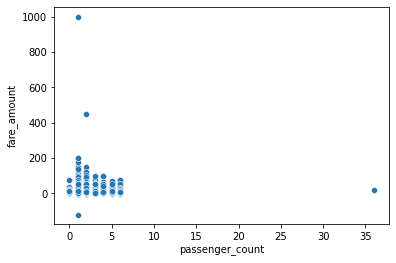

In [20]:
sns.scatterplot(df.passenger_count,df.fare_amount)

passenger_count와 fare_amount의 scatterplot에서 이상치가 확인되었다.
- 음수값의 fare_amount -> (나중에)
- 35이상의 passenger -> max값으로 대체
- 400 이상의 높은 fare_amount -> 제거

In [21]:
display(df[df.fare_amount>300])
display(df[df.fare_amount<0])

,passenger_name,payment_method,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount,time_difference
8478,Alexis Hanson,Credit Card,1,2.6,999.99,200.0,0.0,0 days 00:00:58
20314,Nicholas Thomas,Cash,2,0.0,450.00,0.0,0.0,0 days 00:00:09


,passenger_name,payment_method,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount,time_difference
316,Tiffany Johnson,Cash,6,0.12,-2.5,0.0,0.0,0 days 00:00:29
1648,Debbie Holmes,Credit Card,1,0.04,-2.5,0.0,0.0,0 days 00:00:37
4425,Bobby Wilson,Cash,2,0.06,-3.0,0.0,0.0,0 days 00:01:20
5450,Alejandro Williams,Debit Card,1,0.25,-3.5,0.0,0.0,0 days 00:02:13
5760,Samuel Cooper,Debit Card,1,0.02,-2.5,0.0,0.0,0 days 00:00:16
8206,Stephanie Summers,Credit Card,1,0.41,-3.5,0.0,0.0,0 days 00:02:23
10283,Donna Larson,Credit Card,2,0.00,-2.5,0.0,0.0,0 days 00:02:04
11206,Austin Fields,Debit Card,1,0.64,-4.5,0.0,0.0,0 days 00:02:51
12946,Patrick Herring,Cash,1,0.17,-120.0,0.0,0.0,0 days 23:15:41
14716,Stefanie Warner,Debit Card,5,0.40,-4.0,0.0,0.0,0 days 00:03:10


In [22]:
df.loc[64,'passenger_count'] = 6 #36명은 max값인 6으로 대체

# Debit, Credit 카드로 바꾸기

In [23]:
df['payment_method'].unique()

array(['Debit Card', 'Cash', 'Credit Card'], dtype=object)

In [24]:
df['payment_method'] = df['payment_method'].replace({'Credit Card':'Card','Debit Card': 'Card'})

In [25]:
df

,passenger_name,payment_method,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount,time_difference
0,Pamela Duffy,Card,6,3.34,13.0,2.76,0.00,0 days 00:14:04
1,Michelle Foster,Card,1,1.80,16.0,4.00,0.00,0 days 00:26:30
2,Tina Combs,Card,1,1.00,6.5,1.45,0.00,0 days 00:07:12
3,Anthony Ray,Cash,1,3.70,20.5,6.39,0.00,0 days 00:30:15
4,Brianna Johnson,Card,1,4.37,16.5,0.00,0.00,0 days 00:16:43
...,...,...,...,...,...,...,...,...
22696,Austin Johnson,Cash,3,0.61,4.0,0.00,0.00,0 days 00:03:16
22697,Monique Williams,Cash,1,16.71,52.0,14.64,5.76,0 days 00:40:48
22698,Drew Graves,Card,1,0.42,4.5,0.00,0.00,0 days 00:04:08
22699,Jonathan Copeland,Card,1,2.36,10.5,1.70,0.00,0 days 00:11:56


## tip_amount,tolls_amount 랑 fare_amount의 상관관계

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='tip_amount', ylabel='fare_amount'>

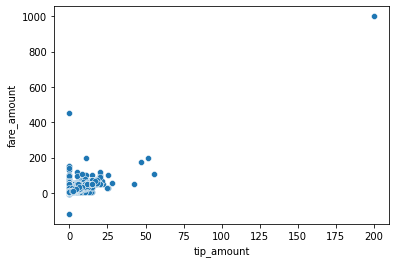

In [26]:
sns.scatterplot(df['tip_amount'],df['fare_amount'])

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='tolls_amount', ylabel='fare_amount'>

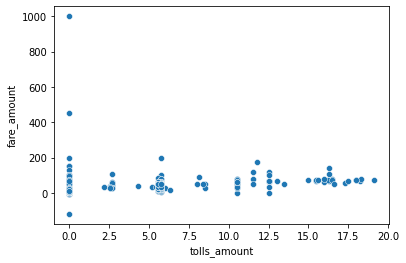

In [27]:
sns.scatterplot(df['tolls_amount'],df['fare_amount'])

In [28]:
df = df[df.fare_amount<400] # fare_amount가 400 이상인 이상치 제거

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='tip_amount', ylabel='fare_amount'>

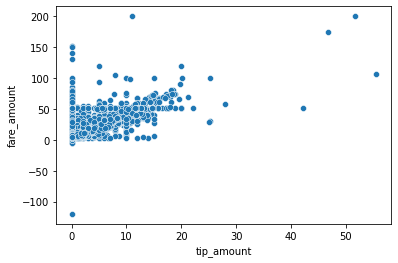

In [29]:
sns.scatterplot(df['tip_amount'],df['fare_amount'])

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='tolls_amount', ylabel='fare_amount'>

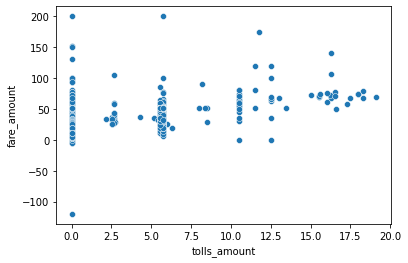

In [30]:
sns.scatterplot(df['tolls_amount'],df['fare_amount'])

## fair_amount와 trip_distance의 상관관계

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='trip_distance', ylabel='fare_amount'>

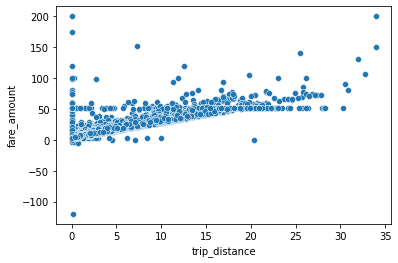

In [31]:
sns.scatterplot(df.trip_distance,df.fare_amount)

trip_distance 와 fare_amount는 어느정도 상관관계를 나타낸다.
몇가지 이상치를 나타내는 특징이 나타나는데,

- 우선 0, 음수가 존재
- 거리가 달라짐에도 50에만 존재하는 fare_amount 존재

이 값들에 대해서 파헤쳐보기로 하자

# fare_amount가 0인 값들 처리

In [32]:
display(df[df['fare_amount']==0])

,passenger_name,payment_method,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount,time_difference
4404,Mrs. Tiffany Brown DDS,Cash,1,7.06,0.0,0.0,0.0,0 days 00:40:57
5724,William Holland,Card,1,0.00,0.0,0.0,0.0,0 days 00:00:02
10508,Travis Vega,Card,1,0.00,0.0,0.0,0.0,0 days 00:00:02
19069,Glenn Garrett,Cash,1,0.10,0.0,0.0,0.0,0 days 00:00:50
21844,Reginald Baker,Cash,2,20.40,0.0,0.0,12.5,0 days 01:34:15
22568,Christine Edwards,Card,1,0.00,0.0,0.0,0.0,0 days 00:00:03


우선 0인 애들을 보자면, trip_distance 가 매우 적거나 애들은 타고내린 시간이 짧은 애들을 제외하고 4404, 21844 번이 이상하다. 이 두개는 trip_distance가 비슷한 애들을 이용해 채워보자

In [33]:
df.loc[4404,'fare_amount'] = df[(df['trip_distance']<7.1)&(df['trip_distance']>7)]['fare_amount'].median()
df.loc[4404]

/opt/conda/lib/python3.9/site-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


passenger_name     Mrs. Tiffany Brown DDS
payment_method                       Cash
passenger_count                         1
trip_distance                        7.06
fare_amount                         24.75
tip_amount                            0.0
tolls_amount                          0.0
time_difference           0 days 00:40:57
Name: 4404, dtype: object

# 고쳐야할 것 : df.loc 사용을 조심히 하자

In [36]:
df.loc[21844,'fare_amount'] = df[(df['trip_distance']<20.1)&(df['trip_distance']>20)]['fare_amount'].median()
df.loc[21844]

/opt/conda/lib/python3.9/site-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


passenger_name      Reginald Baker
payment_method                Cash
passenger_count                  2
trip_distance                 20.4
fare_amount                   52.0
tip_amount                     0.0
tolls_amount                  12.5
time_difference    0 days 01:34:15
Name: 21844, dtype: object

# fare_amount가 음수

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='trip_distance', ylabel='fare_amount'>

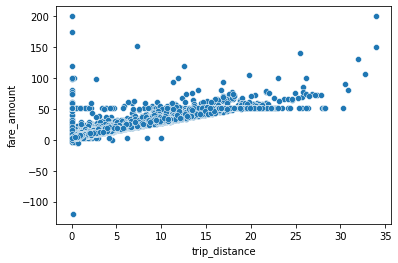

In [38]:
sns.scatterplot(df.trip_distance,df.fare_amount)

In [37]:
display(df[df['fare_amount']<0])

,passenger_name,payment_method,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount,time_difference
316,Tiffany Johnson,Cash,6,0.12,-2.5,0.0,0.0,0 days 00:00:29
1648,Debbie Holmes,Card,1,0.04,-2.5,0.0,0.0,0 days 00:00:37
4425,Bobby Wilson,Cash,2,0.06,-3.0,0.0,0.0,0 days 00:01:20
5450,Alejandro Williams,Card,1,0.25,-3.5,0.0,0.0,0 days 00:02:13
5760,Samuel Cooper,Card,1,0.02,-2.5,0.0,0.0,0 days 00:00:16
8206,Stephanie Summers,Card,1,0.41,-3.5,0.0,0.0,0 days 00:02:23
10283,Donna Larson,Card,2,0.00,-2.5,0.0,0.0,0 days 00:02:04
11206,Austin Fields,Card,1,0.64,-4.5,0.0,0.0,0 days 00:02:51
12946,Patrick Herring,Cash,1,0.17,-120.0,0.0,0.0,0 days 23:15:41
14716,Stefanie Warner,Card,5,0.40,-4.0,0.0,0.0,0 days 00:03:10


In [40]:
df = df.drop(index=12946) #12946은 제거

In [45]:
df_plus = df[df['fare_amount']>=0] # 시간관계상 음수는 나중에

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='trip_distance', ylabel='fare_amount'>

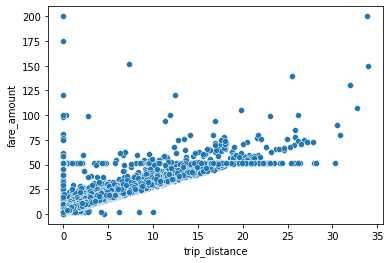

In [46]:
sns.scatterplot(df_plus.trip_distance,df_plus.fare_amount)

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='time_difference', ylabel='fare_amount'>

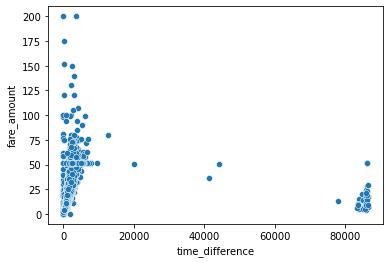

In [51]:
sns.scatterplot(df_plus.time_difference.apply(lambda x: x.total_seconds()),df_plus.fare_amount)

In [55]:
df_time = df_plus[df_plus.time_difference.apply(lambda x: x.total_seconds())<9000]

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='time_difference', ylabel='fare_amount'>

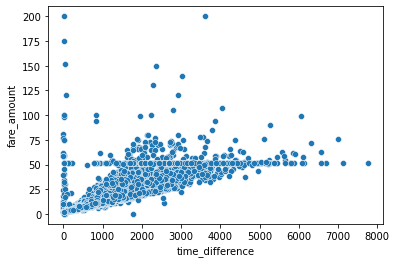

In [56]:
sns.scatterplot(df_time.time_difference.apply(lambda x: x.total_seconds()),df_plus.fare_amount)

시간에 의한 이상치 제거시 46개정도 제거됨. 아직도 50 언저리에 직선이 이상치로 보임. 또한, time difference가 0 주변의 애들중 fare_amount가 놓은 애들이 많이 나타남

시간을 고려하지 않는 방향도 모색할 수 있을 것 같음

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='trip_distance', ylabel='fare_amount'>

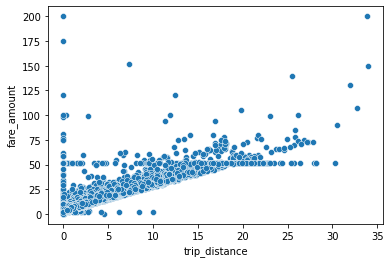

In [59]:
sns.scatterplot(df_time.trip_distance,df_time.fare_amount)

In [66]:
df_trip = df_time[df_time.trip_distance<5]
Q1,Q3 = np.percentile(df_trip["fare_amount"],[25,75])
IQR = Q3-Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = df_trip[(df_trip["fare_amount"] < lower_bound) | (df_trip["fare_amount"] > upper_bound)]

In [71]:
df_time.drop(outliers.index,inplace=True)

/opt/conda/lib/python3.9/site-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='trip_distance', ylabel='fare_amount'>

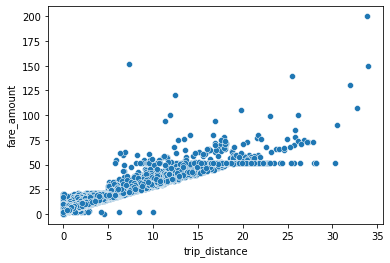

In [72]:
sns.scatterplot(df_time.trip_distance,df_time.fare_amount)

# 회고

오늘 data preprocessing을 진행해보았다. 우선 잘한점은, 스토리를 구성해서, 실수하더라도 금방 다시 돌아올 수 있었다. 어려웠던 점은 서로 연관이 있는 feature들이 있는 가운데 이상치가 각자 다 존재해서 다각도에서 접근해야한다는 점이 매우 까다로웠다. 이대로 지우기만 한다면, 데이터가 얼마 남지 않을 것 같았다. 하지만, 모든 것을 범위에 맞게 집어넣기란 매우 까다로웠고, 결과적으로 모든 이상치를 제거 하지는 못했다. 특히 시간차를 이용해서 아웃라이어를 잡아내려고 했는데, 하고보니 시간치에 이상치가 많아 오히려 독이 되었던 것 같다. 시간이 허락한다면, 여러 계획을 세워 다각도로 접근하면 좋을 것 같다. 특히 협업을 할 때, 이런 부분에 대해서 소통하고, 각자 어떤 계획을 맡아서 할지 정한 다음 data preprocessing을 진행해봐도 좋을 것 같다.